In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings  

In [13]:
print(os.listdir())

['TellCo_data_cleaning.ipynb']


In [14]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('../data/Week1_challenge_data_source.csv')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


Before cleaning exploring what is in it.

In [15]:
#columns names
df.columns.tolist()

['Bearer Id',
 'Start',
 'Start ms',
 'End',
 'End ms',
 'Dur. (ms)',
 'IMSI',
 'MSISDN/Number',
 'IMEI',
 'Last Location Name',
 'Avg RTT DL (ms)',
 'Avg RTT UL (ms)',
 'Avg Bearer TP DL (kbps)',
 'Avg Bearer TP UL (kbps)',
 'TCP DL Retrans. Vol (Bytes)',
 'TCP UL Retrans. Vol (Bytes)',
 'DL TP < 50 Kbps (%)',
 '50 Kbps < DL TP < 250 Kbps (%)',
 '250 Kbps < DL TP < 1 Mbps (%)',
 'DL TP > 1 Mbps (%)',
 'UL TP < 10 Kbps (%)',
 '10 Kbps < UL TP < 50 Kbps (%)',
 '50 Kbps < UL TP < 300 Kbps (%)',
 'UL TP > 300 Kbps (%)',
 'HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Activity Duration DL (ms)',
 'Activity Duration UL (ms)',
 'Dur. (ms).1',
 'Handset Manufacturer',
 'Handset Type',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with Vol DL < 6250B',
 'Nb of sec with Vol UL < 1250B',
 'Socia

In [16]:
#number of data points
print(f" There exist {df.shape[0]} rows and {df.shape[1]} columns ")

 There exist 150001 rows and 55 columns 


In [17]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

Handling the problem(missing value)

In [18]:
#to check missing values and make sure it read all them
missing_value ={"N/a", "na", np.nan}
df = pd.read_csv('../data/Week1_challenge_data_source.csv', na_values=missing_value)
df.isnull().sum().sum()


1031392

<AxesSubplot:>

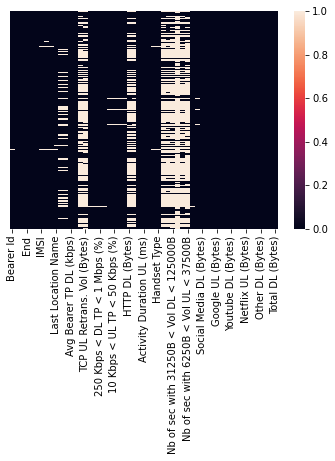

In [19]:
sns.heatmap(df.isnull(), yticklabels=False)

In [20]:
#to findthe % of missing values
def missing_data_percentage(df):
    #total number of cells in dataframe
    totalCells = np.product(df.shape)
    #count number of missing values per column
    missingCount = df.isnull().sum()
    #total numbers of missing values
    totalMissing = missingCount.sum()
    #percentage of missing values
    print(f" The TellCo dataset contains, {round(((totalMissing/totalCells) * 100) , 2)}% missing values.") 
missing_data_percentage(df)   

 The TellCo dataset contains, 12.5% missing values.


Remove missing values

In [21]:
#drop columns with more than 30% missing values
clean_data = df.drop(['TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)','HTTP DL (Bytes)','HTTP UL (Bytes)','Nb of sec with 125000B < Vol DL','Nb of sec with 1250B < Vol UL < 6250B','Nb of sec with 31250B < Vol DL < 125000B','Nb of sec with 37500B < Vol UL','Nb of sec with 6250B < Vol DL < 31250B','Nb of sec with 6250B < Vol UL < 37500B'], axis=1)
clean_data.shape
clean_data.isnull().sum().sum()



68881

In [22]:
#Looking at the skewness of data over column axis
clean_data.skew(axis = 1, skipna = True)


0         6.324555
1         6.324555
2         6.164414
3         6.164414
4         6.164414
            ...   
149996    6.324555
149997    6.324555
149998    6.324555
149999    6.324555
150000    2.290908
Length: 150001, dtype: float64

In [23]:
clean_data = df.interpolate()

In [24]:
clean_data.isnull().sum()



Bearer Id                                      0
Start                                          1
Start ms                                       0
End                                            1
End ms                                         0
Dur. (ms)                                      0
IMSI                                           0
MSISDN/Number                                  0
IMEI                                           0
Last Location Name                          1153
Avg RTT DL (ms)                                0
Avg RTT UL (ms)                                0
Avg Bearer TP DL (kbps)                        0
Avg Bearer TP UL (kbps)                        0
TCP DL Retrans. Vol (Bytes)                    7
TCP UL Retrans. Vol (Bytes)                    9
DL TP < 50 Kbps (%)                            0
50 Kbps < DL TP < 250 Kbps (%)                 0
250 Kbps < DL TP < 1 Mbps (%)                  0
DL TP > 1 Mbps (%)                             0
UL TP < 10 Kbps (%) 

In [47]:
#clean 'Handset Manufacturer and Handset Type 
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
    return df[col]
def fix_missing_bfill(df, col):
    df[col] = df[col].fillna(method='bfill')
    return df[col]

# clean_data['Handset Manufacturer'] = fix_missing_ffill(clean_data, 'Handset Manufacturer') 
clean_data['Start'] = fix_missing_ffill(clean_data, 'Start') 
clean_data['End'] = fix_missing_ffill(clean_data, 'End') 



In [53]:
#fill missing value of Handset Manufacturer using mode
clean_data['Handset Manufacturer'] =clean_data['Handset Manufacturer'].fillna(clean_data['Handset Manufacturer'].mode()[0])
#fill missing value of Handset Type  using mode
clean_data['Handset Type'] =clean_data['Handset Type'].fillna(clean_data['Handset Type'].mode()[0])
#fill missing value of Last Location Name using mode
clean_data['Last Location Name'] =clean_data['Last Location Name'].fillna(clean_data['Last Location Name'].mode()[0])
#fill missing value of TCP DL Retrans. Vol (Bytes) using median
clean_data['TCP DL Retrans. Vol (Bytes)'] =clean_data['TCP DL Retrans. Vol (Bytes)'].fillna(clean_data['TCP DL Retrans. Vol (Bytes)'].median())
#fill missing value of TCP UL Retrans. Vol (Bytes) using median
clean_data['TCP UL Retrans. Vol (Bytes)'] =clean_data['TCP UL Retrans. Vol (Bytes)'].fillna(clean_data['TCP UL Retrans. Vol (Bytes)'].median())
#fill missing value of HTTP DL (Bytes) using median
clean_data['HTTP DL (Bytes)'] =clean_data['HTTP DL (Bytes)'].fillna(clean_data['HTTP DL (Bytes)'].median())
#fill missing value of HTTP UL (Bytes) using median
clean_data['HTTP UL (Bytes)'] =clean_data['HTTP UL (Bytes)'].fillna(clean_data['HTTP UL (Bytes)'].median())
#fill missing value of Nb of sec with 125000B < Vol DL using median
clean_data['Nb of sec with 125000B < Vol DL'] =clean_data['Nb of sec with 125000B < Vol DL'].fillna(clean_data['Nb of sec with 125000B < Vol DL'].median())
#fill missing value of Nb of sec with 1250B < Vol UL < 6250B using median
clean_data['Nb of sec with 1250B < Vol UL < 6250B'] =clean_data['Nb of sec with 1250B < Vol UL < 6250B'].fillna(clean_data['Nb of sec with 1250B < Vol UL < 6250B'].median())
#fill missing value of Nb of sec with 31250B < Vol DL < 125000B using median
clean_data['Nb of sec with 31250B < Vol DL < 125000B'] =clean_data['Nb of sec with 31250B < Vol DL < 125000B'].fillna(clean_data['Nb of sec with 31250B < Vol DL < 125000B'].median())
#fill missing value of Nb of sec with 37500B < Vol UL using median
clean_data['Nb of sec with 37500B < Vol UL'] =clean_data['Nb of sec with 37500B < Vol UL'].fillna(clean_data['Nb of sec with 37500B < Vol UL'].median())
#fill missing value of Nb of sec with 6250B < Vol DL < 31250B using median
clean_data['Nb of sec with 6250B < Vol DL < 31250B'] =clean_data['Nb of sec with 6250B < Vol DL < 31250B'].fillna(clean_data['Nb of sec with 6250B < Vol DL < 31250B'].median())
#fill missing value of Nb of sec with 6250B < Vol UL < 37500B using median
clean_data['Nb of sec with 6250B < Vol UL < 37500B'] =clean_data['Nb of sec with 6250B < Vol UL < 37500B'].fillna(clean_data['Nb of sec with 6250B < Vol UL < 37500B'].median())

clean_data.isnull().sum().sum()

0

In [ ]:
#Creating a clean csv file
clean_data.to_csv('../data/clean_TellCo_data.csv', index=False)